In [1]:

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from fetch_data import fetch_data
from pickle import load

model = tf.keras.models.load_model('LSTM_V2_BTC.h5')
import pickle
# scalerfile = 'scaler.sav'
# scaler = pickle.load(open(scalerfile, 'rb'))
scaler = load(open('scaler.pkl', 'rb'))
n_past = 10
def get_pred():
    df=fetch_data(20)
    data =df['Close']
    init_date = df["Date"][0]
    data = np.array(data)


    data1= data[:10]
    input_data =data1
    data_scaled = data1.reshape((n_past,1))
# print(len(data_scaled))
    data_scaled = scaler.transform(data_scaled).tolist()
    out_data = []
    i=0
    ran = len(data)-5
    while(i<ran):
        x_input=data_scaled[len(data_scaled)-n_past:]
#   print(f" for input : {x_input}")
        x_input=np.array(x_input).reshape((1,n_past,1))
        y_pred = model.predict(x_input)[0][0]
  # print(f" Output is : {y_pred}")
        actual_p =scaler.inverse_transform([[y_pred]]).tolist()
        out_data.append(actual_p[0][0])
        data_scaled.append([y_pred])
        i=i+1
        # print(out_data)
    plt.figure(figsize=(20,10))
    datelist = pd.date_range(init_date , periods=len(data)+i-1)
    ax=sns.lineplot(datelist[:len(data)],data, label='input', marker='o')
    ax=sns.lineplot(datelist[10:len(data)+5],out_data ,label='Prediction', marker='o')
# sns.lineplot(datelist[10:len(data)+10],out_data ,label='Prediction', linestyle='dashed')
# plt.plot(np.arange(0,len(data)),data, label='input', marker='o')
# plt.plot(np.arange(10,len(data)),out_data ,label='Prediction', linestyle='dashed')
    plt.title(f" Data of Days :{len(data)}")
#     ax.plot()
    return ax
    # plt.legend()


c:\users\rahul agrawal\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:313: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.22.2.post1 when using version 0.22.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


[*********************100%***********************]  1 of 1 completed


c:\users\rahul agrawal\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\rahul agrawal\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

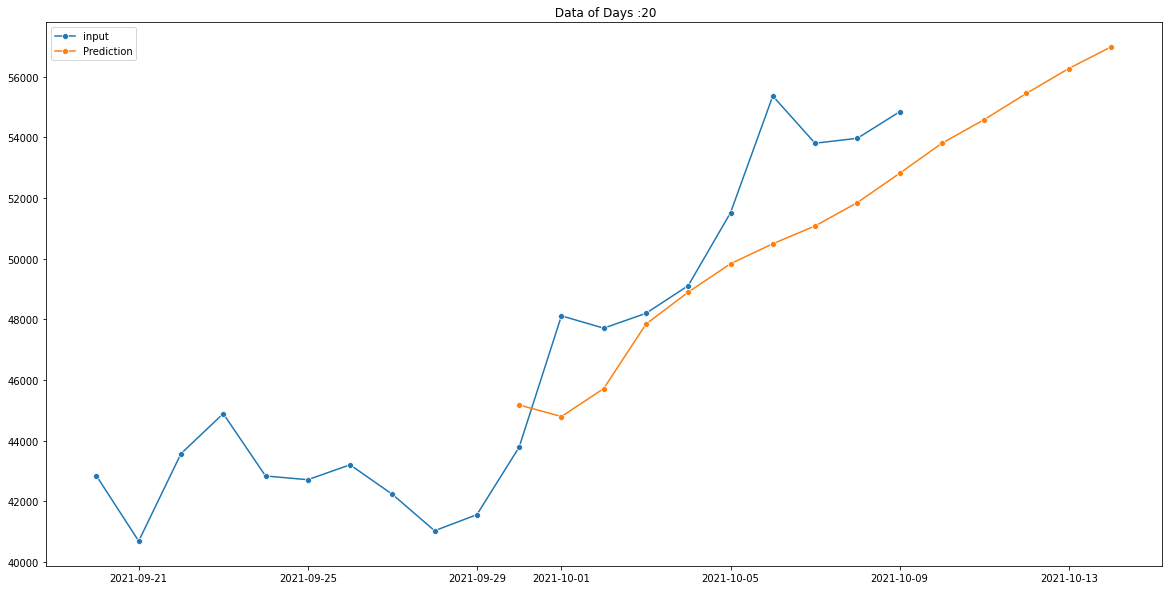

In [2]:
im=get_pred()

im.plot()